<a href="https://colab.research.google.com/github/kjl3467/GeneExpressionPrediction/blob/main/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os


# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2022WI folder and put all the files under A3 folder, then '2022WI/A3'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'GeneCausality Search'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['matrix_main.mtx', 'matrix_early.mtx', 'metadata_early.tsv', 'metadata_main.tsv', 'features.tsv', 'Transcriptional programs of circuit assembly in the Drosophila visual system.pdf', 'Transcriptional programs of circuit assembly in the Drosophila visual system Visuals.pdf', 'boruta_py.py', 'TF_List.csv', 'CAM_List.csv', '__pycache__', 'xgb_random_search_results.csv', 'Gene_Causality.py', 'testing.ipynb']


In [2]:
!pip install boruta

In [5]:
import pandas as pd
from Gene_Causality import GeneCasuality_Search
import numpy as np
import matplotlib.pyplot as plt

In [6]:
search = GeneCasuality_Search()

Look at DIP-delta , DIP-eta
1.Subset to jsut neurons

2. Cell type, Look at just one type
3. `Try LPLC1. LPLC2 as type
    Keep at 48 hr

4. Make github. Aggregate them all in one place
5. Pull out best 'gene' and upload

In [7]:


search.read_genomic_data('/content/drive/MyDrive/GeneCausality Search/matrix_early.mtx','/content/drive/MyDrive/GeneCausality Search/matrix_main.mtx')
search.read_metadata('/content/drive/MyDrive/GeneCausality Search/metadata_early.tsv','/content/drive/MyDrive/GeneCausality Search/metadata_main.tsv','/content/drive/MyDrive/GeneCausality Search/features.tsv')
search.read_genes('/content/drive/MyDrive/GeneCausality Search/features.tsv')

In [8]:
search.read_master_genes('/content/drive/MyDrive/GeneCausality Search/TF_List.csv','/content/drive/MyDrive/GeneCausality Search/CAM_List.csv')

In [12]:
print(search)

                         barcode   set rep  trep  genotype time class  type subtype  fd19B  ac  sc  l(1)sc  ase  CG17829  Atf3  CG11398  usp  CG14050  gt  dwg  CG2712  HLH3B  Mnt  bi  Usf  CG32772  Klf15  CG32767  CG12236  CG3726  CG3847  CG12219  al  ush  Pph13  Gsc  Ets21C  cbt  dbr  CG11617  net  knrl  CG11456  Six4  kni  Eip78C  Aef1  Hr78  Neu2  croc  eg  CG11247  CG10979  cas  MTA1-like  CG14655  Dlip2  vri  H15  dsf  H2.0  sens-2  CG13775  CG4496  SoxN  Hnf4  tai  gcm2  gcm  CG13123  GATAd  Hand  CG12299  salr  crol  Plzf  pdm2  kmg  Bdp1  Mabi  CG16863  elB  noc  NC2beta  Su(H)  CG15269  stc  esg  sna  wor  wek  CG17328  crp  her  BuGZ  Oli  Dif  amos  tup  ham  CG10348  CG10431  Sidpn  Lim3  tj  CG10366  Nf-YB  CG10631  Hr38  cad  E2f2  dimm  Mondo  Fer1  Dfd  ftz  Scr  bcd  zen  zen2  Hr83  Zif  CG9727  CG2678  dsx  Pbp95  grn  ato  CG7963  Poxm  nom  ouib  CG8159  M1BP  ranshi  hb  CG11970  sage  D1  CG8301  CG8319  CG16779  topi  nerfin-2  CG6254  jumu  Rfx  CG4820  CG31441

In [21]:
search.working_data

<57002x17561 sparse matrix of type '<class 'numpy.uint8'>'
	with 105512484 stored elements in Compressed Sparse Row format>

In [18]:
search.working_genes.fbname

7        FBgn0031086
20       FBgn0000022
21       FBgn0004170
22       FBgn0002561
23       FBgn0000137
            ...     
17206    FBgn0028482
17234    FBgn0000547
17256    FBgn0051774
17496    FBgn0041097
17508    FBgn0002543
Name: fbname, Length: 847, dtype: object

In [10]:
search.subset_tf_cam()

In [9]:
checking_dict={}

In [ ]:
params = {
    'gamma': 0.15,
    'min_child_weight': 1,
    'max_depth': 14,
    'subsample': 0.8,
    'colsample_bytree': 0.69,
    'learning_rate': 0.2,
    'verbosity':2,
    'tree_method': 'hist',

    'n_estimators': 100,
    'device': 'cuda',
    'objective': 'reg:squaredlogerror',  # Example for binary classification task
    'eval_metric': 'mae'  # Example for binary classification task
}


In [ ]:
search.cam_data.toarray().max()

127

In [ ]:
search.train_model(0.005,params)
search.evaluate_performance()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:19:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoostError: [15:19:04] /workspace/src/objective/regression_obj.cu:144: label must be greater than -1 for rmsle so that log(label + 1) can be valid.
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xa8dc0a) [0x78747b924c0a]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xaaa570) [0x78747b941570]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x55f9ed) [0x78747b3f69ed]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4900d1) [0x78747b3270d1]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4c0716) [0x78747b357716]
  [bt] (5) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4c5274) [0x78747b35c274]
  [bt] (6) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x78747aff8ef0]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x787504d52e2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x787504d4f493]



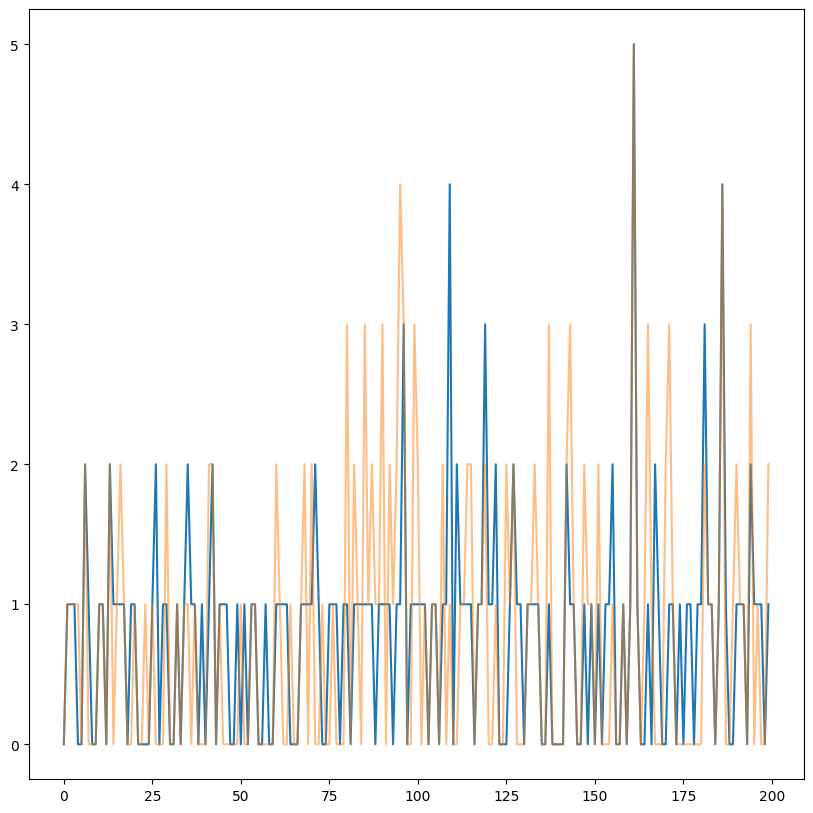

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.maximum(np.round(search.trained_model.predict(search.
                             test[0]))[:,11][:200],0))
plt.plot(search.test[1][:,11][:200].toarray(),alpha=0.5)

In [ ]:
import pickle
pickle.dump((search.train,search.test,search.trained_model), open("neuron_48hr.sav", "wb"))

ValueError: ctypes objects containing pointers cannot be pickled

In [ ]:
np.maximum(np.round(search.trained_model.predict(search.
                             test[0]))[:,3],0)

array([ 3.,  0.,  1., ...,  4.,  8., 28.], dtype=float32)

In [ ]:
pickle.dump(search.train,open("test.sav", "wb"))

ValueError: ctypes objects containing pointers cannot be pickled

In [ ]:
pickle.dump(search.test[1],open("test_mat.sav", "wb"))

In [ ]:
xgb_reg = pickle.load(open("neuron_48hr.sav", "rb"))

In [ ]:
xgb_reg

In [ ]:
checking_dict[params.values] = search.evaluate_performance()[0]
checking_dict[params.values]


AttributeError: 'NoneType' object has no attribute 'predict'

In [ ]:
pickle.dump(search, open("search_neuron_48hr.sav", "wb"),pickle.HIGHEST_PROTOCOL)

ValueError: ctypes objects containing pointers cannot be pickled

In [ ]:
search.trained_model.save_model('/content/drive/MyDrive/GeneCausality Search/trained_model.h5')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:50:31] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [ ]:
import xgboost as xgb
model = xgb.Booster().load_model('/content/drive/MyDrive/GeneCausality Search/trained_model.h5')

In [ ]:
type(xgb.Booster().load_model('/content/drive/MyDrive/GeneCausality Search/trained_model.h5'))

NoneType

In [ ]:
search.trained_model = model

In [ ]:
search.train_model(0.01,params)
search.evaluate_performance()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:24:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[13:24:31] INFO: /workspace/src/data/simple_dmatrix.cc:137: Generating new Ellpack page.


(0.60371774,
      Performance
 0       2.861960
 1       0.035072
 2       0.023381
 3       2.007644
 4       0.702788
 ..           ...
 209     0.161421
 210     1.194694
 211     1.084083
 212     0.450989
 213     0.358363
 
 [214 rows x 1 columns])

In [ ]:
search.evaluate_performance()

AttributeError: 'NoneType' object has no attribute 'predict'

In [ ]:
from sklearn.model_selection import train_test_split
train_test_split(search.tf_data, search.cam_data, test_size=5e-2)

In [ ]:

search.tf_data,search.cam_data

(<222360x633 sparse matrix of type '<class 'numpy.int8'>'
 	with 19414407 stored elements in Compressed Sparse Row format>,
 <222360x214 sparse matrix of type '<class 'numpy.int8'>'
 	with 12077088 stored elements in Compressed Sparse Row format>)

In [11]:
search.subset_data(**{'time':['48h'],'class':'N'})

In [ ]:
search.trained_model.predict(search.test[0])[:]

(571, 214)

In [ ]:
search.reset_analysis()

In [ ]:
!watch -n1 nvidia-smi

In [ ]:
plt.plot(range(214),np.mean(np.abs(np.round(search.trained_model.predict(search.test[0])) - search.test[1]),axis=0).reshape(214,1))

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(search.tf_data.toarray(), search.cam_data.toarray(), test_size=5e-2)
xgb_model = XGBRegressor(tree_method='hist',device='cuda', objective='reg:squarederror', verbosity=2,n_jobs=-1)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=2, verbose=2)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.4,
 'learning_rate': 0.2,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 300}

In [ ]:
param_grid = {
    'n_estimators': [ 400]}

In [ ]:
param_grid = {
    'n_estimators': [ 100, 300],  # n_estimators included here
    'max_depth': [ 6, 9],
    'subsample': [0.8],
    'learning_rate': [0.01,  0.2],
    'gamma': [ 0.2, 0.4],
    'min_child_weight': [1],
    'colsample_bytree': [ 0.8]
    # other parameters
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(search.tf_data.toarray(), search.cam_data.toarray(), test_size=5e-2)
# Define the parameter space:

# Define new parameter distributions around the best found values
param_distributions = {
    'n_estimators': randint(250, 350),  # Exploring around 300
    'gamma': uniform(0.35, 0.1),  # Correctly exploring around 0.4
    'min_child_weight': randint(1, 3),  # Exploring around 1
    'max_depth': randint(7, 11),  # Exploring around 9
    'subsample': uniform(0.75, 0.1),  # Correctly exploring values between 0.75 and 0.85
    'colsample_bytree': uniform(0.75, 0.1),  #  Correctly exploring values between 0.75 and 0.85
    'learning_rate': uniform(0.15, 0.25),  # Exploring around 0.15 to 0.4 (adjust if needed)
}

# Create the base model to tune:
xgb_regressor = XGBRegressor(tree_method='hist', device='cuda', objective='reg:squarederror', eval_metric='mae', verbosity=2)

# Set up the random search with 4-fold cross-validation:
random_search = RandomizedSearchCV(estimator = xgb_regressor, param_distributions = param_distributions, n_iter = 1, cv = 2, verbose=3, random_state=42,n_jobs=-1)

# Fit the random search model:
random_search.fit(X_train, y_train)
results = pd.DataFrame(random_search.cv_results_)

# Selecting columns to save: you can adjust this list based on the information you want to keep
columns_to_save = ['rank_test_score', 'mean_test_score', 'std_test_score', 'params']
results_to_save = results[columns_to_save]

# Save to CSV
results_to_save.to_csv('/content/drive/MyDrive/GeneCausality Search/xgb_random_search_results.csv', index=False)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


In [ ]:
random_search.cv_results_

{'mean_fit_time': array([744.16335773]),
 'std_fit_time': array([0.23071003]),
 'mean_score_time': array([26.00099039]),
 'std_score_time': array([0.05366135]),
 'param_colsample_bytree': masked_array(data=[0.7874540118847363],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.4450714306409916],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.33299848545285127],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[7],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[332],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_subsample': masked_arr

In [ ]:
results = pd.DataFrame(random_search.cv_results_)

# Selecting columns to save: you can adjust this list based on the information you want to keep
columns_to_save = ['rank_test_score', 'mean_test_score', 'std_test_score', 'params']
results_to_save = results[columns_to_save]

# Save to CSV
results_to_save.to_csv('/content/drive/MyDrive/GeneCausality Search/xgb_random_search_results.csv', index=False)

In [ ]:
params = {
    'n_estimators': 300,
    'gamma': 0.4,
    'min_child_weight': 1,
    'max_depth': 9,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'learning_rate': 0.2,
    'verbosity':2,
    'tree_method': 'hist',
    'device': 'cuda',
    'objective': 'reg:squarederror',  # Example for binary classification task
    'eval_metric': 'mae'  # Example for binary classification task
}

In [ ]:
params = {
    'n_estimators': 300,
    'gamma': 0.4,
    'min_child_weight': 1,
    'max_depth': 9,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'learning_rate': 0.2,
    'verbosity':2,
    'tree_method': 'hist',
    'device': 'cuda',
    'objective': 'reg:squarederror',  # Example for binary classification task
    'eval_metric': 'mae'  # Example for binary classification task
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
np.mean(np.abs(search.test[1] - model.predict(search.test[0])),axis=0)

In [ ]:
list(search.working_genes[search.working_genes.gene_name.str.lower().isin(search.tf_masterlist)].index)

In [ ]:
len(set(list(search.working_genes[search.working_genes.gene_name.str.lower().isin(search.cam_masterlist)].index)+list(search.working_genes[search.working_genes.gene_name.str.lower().isin(search.tf_masterlist)].index)))

In [ ]:
pd.read_csv('TF_List.csv').iloc[:,0].str.lower()

In [ ]:
[100, 200, 300, 400, 500]

In [ ]:
search.working_genes

In [ ]:
pd.read_csv('features.tsv',names = ['fbname','gene_name','expression'],delimiter='\t')

In [ ]:
search.working_genes

In [ ]:
search.working_data